# 📊 Análise Exploratória dos Dados sobre Mercado de Trabalho em AI

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

# Leitura dos dados
df_jobs = pd.read_csv('ai_job_dataset.csv')
df_market = pd.read_csv('ai_job_market_insights.csv')
df_salaries = pd.read_csv('salaries.csv')

# Visualização geral
df_jobs.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## 1. Distribuição dos salários em vagas de AI

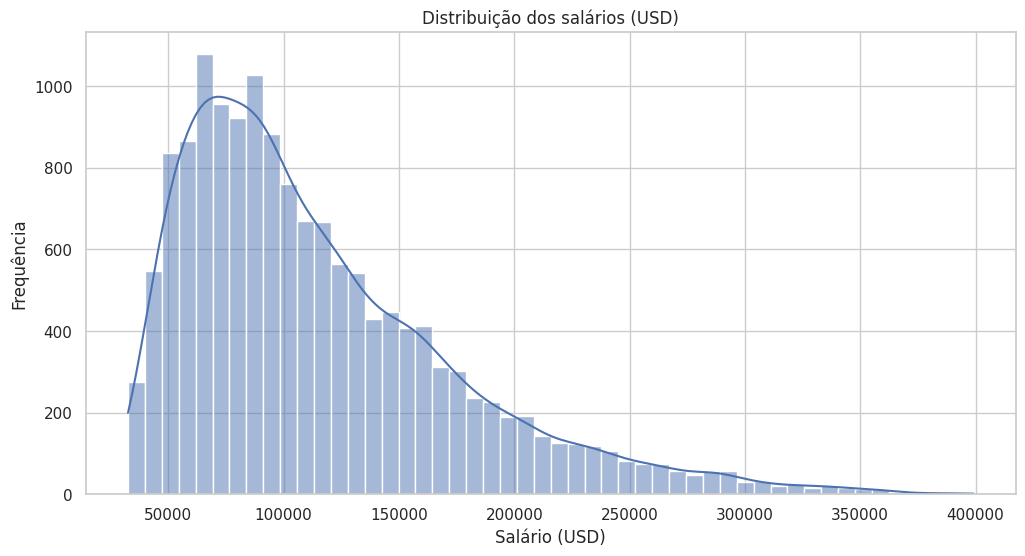

In [3]:

sns.histplot(df_jobs['salary_usd'], kde=True, bins=50)
plt.title('Distribuição dos salários (USD)')
plt.xlabel('Salário (USD)')
plt.ylabel('Frequência')
plt.show()


## 2. Salário médio por cargo

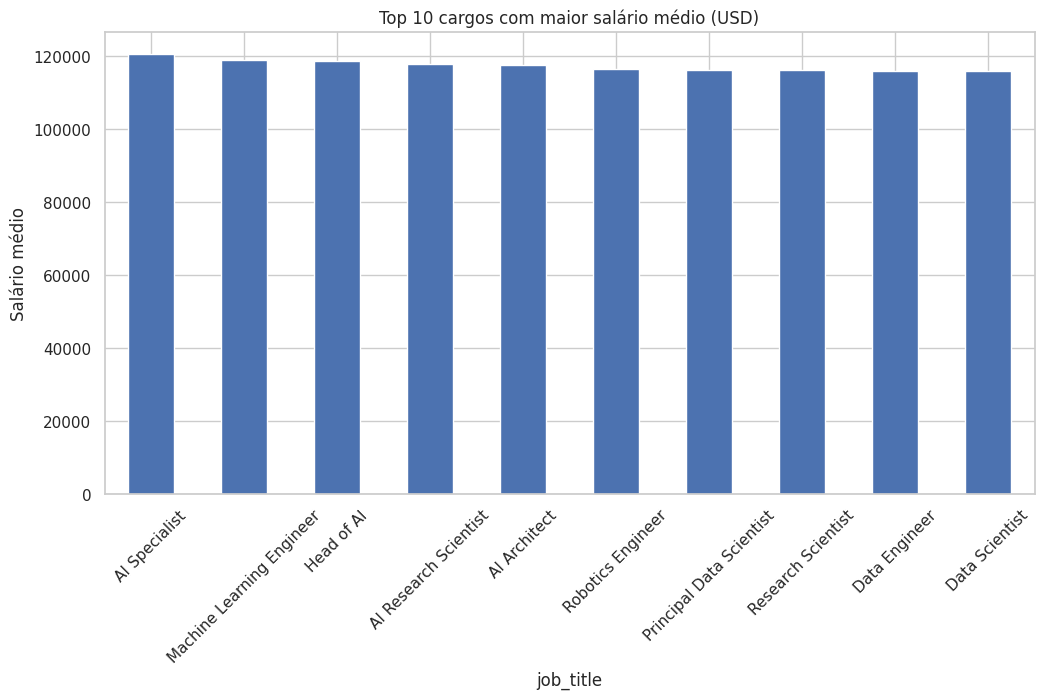

In [4]:

mean_salary_by_title = df_jobs.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(10)
mean_salary_by_title.plot(kind='bar')
plt.title('Top 10 cargos com maior salário médio (USD)')
plt.ylabel('Salário médio')
plt.xticks(rotation=45)
plt.show()


## 3. Correlação entre anos de experiência e salário

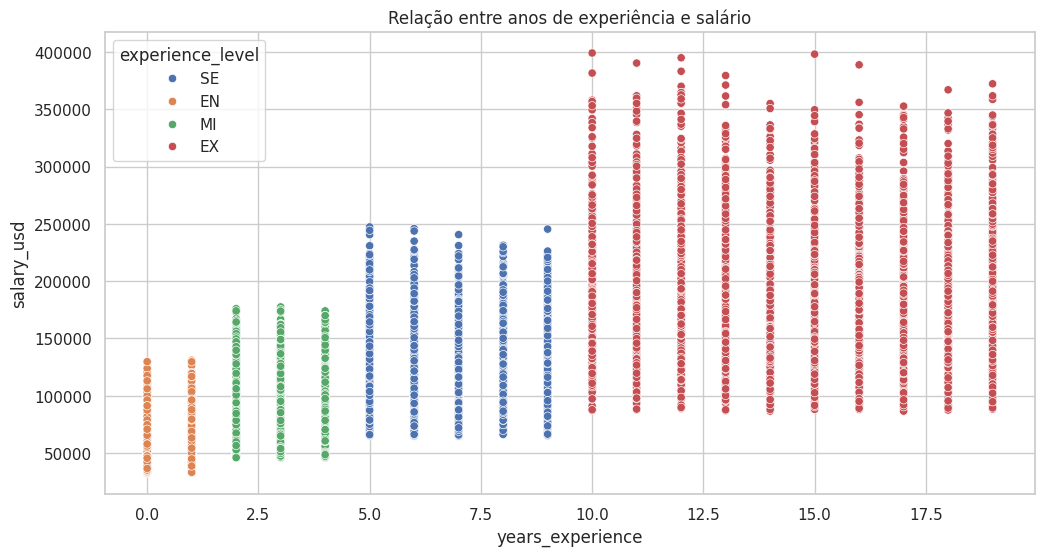

In [5]:

sns.scatterplot(data=df_jobs, x='years_experience', y='salary_usd', hue='experience_level')
plt.title('Relação entre anos de experiência e salário')
plt.show()


## 4. Salário por tipo de trabalho (Remoto, Presencial, Híbrido)

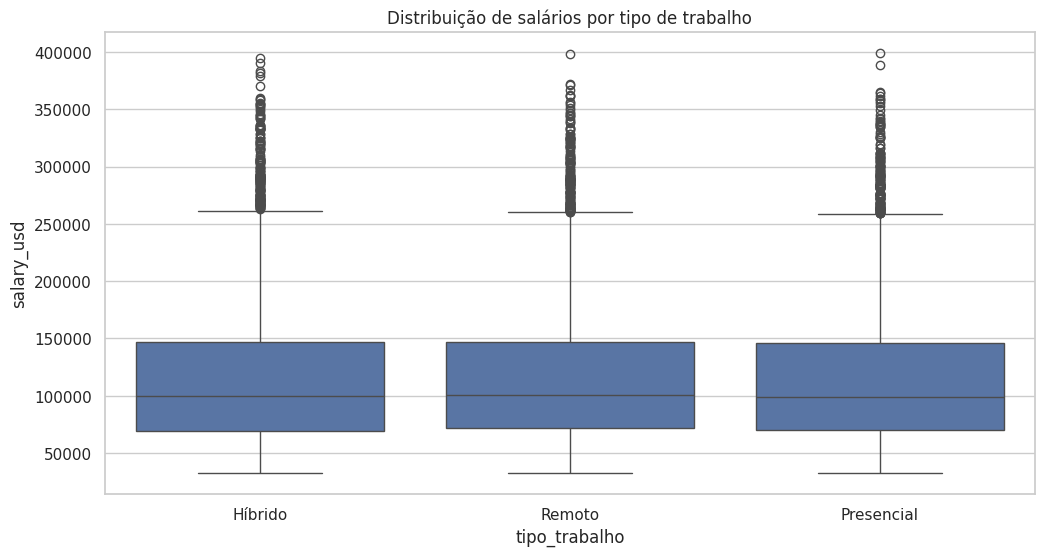

In [6]:

df_jobs['tipo_trabalho'] = df_jobs['remote_ratio'].apply(
    lambda x: 'Remoto' if x == 100 else ('Presencial' if x == 0 else 'Híbrido'))

sns.boxplot(data=df_jobs, x='tipo_trabalho', y='salary_usd')
plt.title('Distribuição de salários por tipo de trabalho')
plt.show()


## 5. Vagas ao longo do tempo

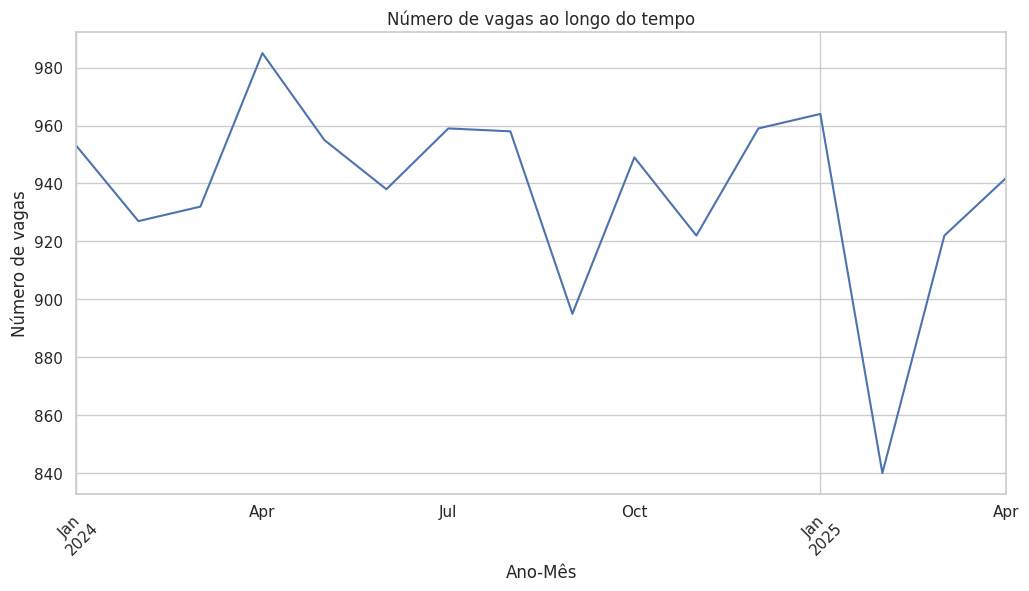

In [7]:

df_jobs['posting_date'] = pd.to_datetime(df_jobs['posting_date'])
vagas_por_mes = df_jobs['posting_date'].dt.to_period('M').value_counts().sort_index()

vagas_por_mes.plot()
plt.title('Número de vagas ao longo do tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Número de vagas')
plt.xticks(rotation=45)
plt.show()
